In [1]:
# for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for interaction
from ipywidgets import interact


In [2]:
df = pd.read_csv('data.csv') # to read the dataset in csv

In [3]:
# to have look on top and bottom 5 rows of dataset
top_rows = df.head()
bottom_rows =df.tail()
print(top_rows)
print('-----------------------------------------------------------------')
print(bottom_rows)

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
-----------------------------------------------------------------
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [4]:
df.info() # show the number of rows, columns, data_type and available values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe(include = 'all') # statistical over look of dataset

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [6]:
df.isnull().sum() # to check number of null values in each column

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print(df.nunique()) # Number of unique values in each column

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64


In [9]:
df.columns #columns in the dataset

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
crop_df =df.copy()

cols =['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    crop_df[col]=crop_df[col].apply(lambda x: round(x, 2))

In [11]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice


In [12]:
#Classification of crops
print("Total number of crops is : ", crop_df['label'].nunique())
print('-------------------------------')
print('Type of crops')
print(crop_df['label'].value_counts())
crops =list(crop_df['label'].unique())

print('***************************************************')
print("Agricultural crops")
agri_crop= list(crops[:9]+ crops[19:21])
print(agri_crop)
print('----------------------------------------------------')
print("Horticultural crops")
hort_crop =[]
for i in crops:
    if i not in agri_crop:
        hort_crop.append(i)        
print(hort_crop)
      

Total number of crops is :  22
-------------------------------
Type of crops
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
***************************************************
Agricultural crops
['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'cotton', 'jute']
----------------------------------------------------
Horticultural crops
['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee']


In [13]:
crops = list(crop_df['label'].unique())

Tropical= []
Temparate = []
for crop in crops:
    tem_max = crop_df[crop_df['label']== crop]['temperature'].max()
    if tem_max > 25:
        Tropical.append(crop)
    else:
        Temparate.append(crop)
    
print("Tropical crops are", Tropical)
print("Temparate crops are", Temparate)

Tropical crops are ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
Temparate crops are ['chickpea', 'kidneybeans', 'pomegranate', 'apple']


Data has 2200 rows and 8 columns
*********************************************
Average value of  N is 50.55
Average value of  P is 53.36
Average value of  K is 48.15
Average value of  temperature is 25.62
Average value of  humidity is 71.48
Average value of  ph is 6.47
Average value of  rainfall is 103.46
Do you want visualise this: yes - y or no - n: 


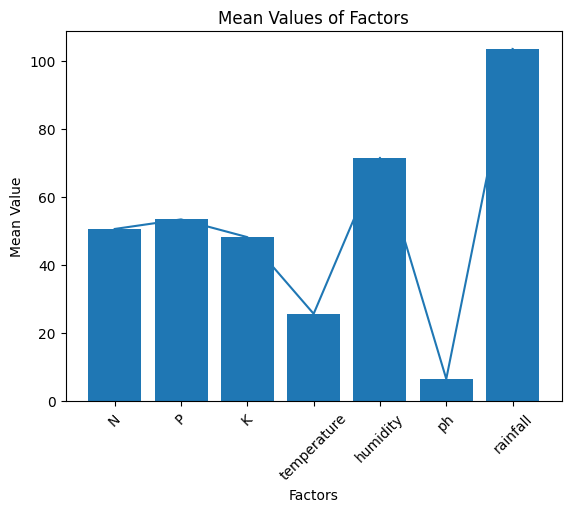

In [14]:
# user function for calucalating average values of each factors

factors = list(crop_df.loc[0:1, 'N':'rainfall']) #list out the factors except label

def mean_data(factors, df): # function to calculate average
    sh =df.shape
    print(f'Data has {sh[0]} rows and {sh[1]} columns')
    print('*********************************************')
    mean_value = {}
    for i in factors:
        m = df[i].mean()
        mean_value[i] = m
        print("Average value of ",i, "is",m.round(2))
    x = input("Do you want visualise this: yes - y or no - n: ")
    if x.lower() == 'n':
        return 
    else:
        plt.plot(mean_value.keys(), mean_value.values())
        plt.bar(mean_value.keys(), mean_value.values())
        plt.xlabel("Factors")
        plt.ylabel("Mean Value")
        plt.title("Mean Values of Factors")
        plt.xticks(rotation=45)
        plt.show()
            
mean_data(factors, crop_df) 

In [15]:
agri_df =crop_df[crop_df['label'].isin(agri_crop)] #new dataset for agricultural crops

horti_df=crop_df[crop_df['label'].isin(hort_crop)] #new dataset for horticultural crops


Average of different factors affecting agricultural crops

Data has 1100 rows and 8 columns
*********************************************
Average value of  N is 48.78
Average value of  P is 56.66
Average value of  K is 28.93
Average value of  temperature is 24.81
Average value of  humidity is 60.18
Average value of  ph is 6.62
Average value of  rainfall is 102.25
Do you want visualise this: yes - y or no - n: 


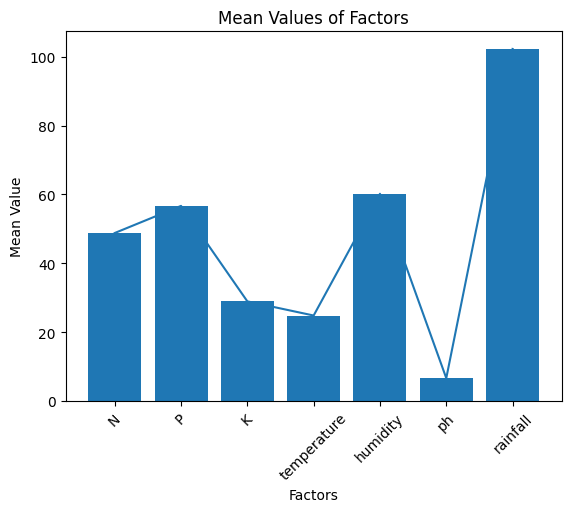

**********************************************************************
Average of different factors affecting horticultural crops

Data has 1100 rows and 8 columns
*********************************************
Average value of  N is 52.32
Average value of  P is 50.06
Average value of  K is 67.37
Average value of  temperature is 26.42
Average value of  humidity is 82.79
Average value of  ph is 6.32
Average value of  rainfall is 104.68
Do you want visualise this: yes - y or no - n: 


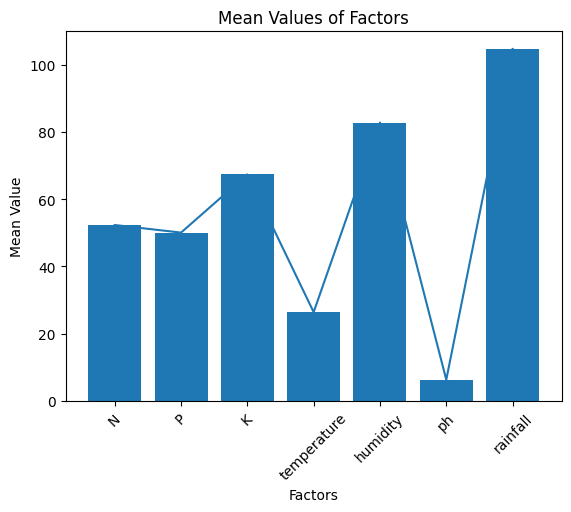

In [17]:
print('Average of different factors affecting agricultural crops')
print()
mean_data(factors, agri_df)
print('**********************************************************************')
print('Average of different factors affecting horticultural crops')
print()
mean_data(factors, horti_df)



# When comparing agriculture and horticulture crops across all factors, with the exception of 'K,' a significant difference in requirements is evident

In [18]:
@interact   # To create interactive function 

def summery(crops = list(crop_df['label'].unique())):
    X=crop_df[crop_df['label']==crops]
    for i in factors:
        print("-------------------------------------------------")
        print("statistics for", i)
        print("Minimum", i, "Required : ", X[i].min())
        print("Average", i, "Required : ", X[i].mean())
        print("Maximum ", i, "Required : ", X[i].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [19]:
# lets compare the average requirement for each crops with average conditions
crops=crop_df['label'].unique()
@interact

def compare(conditions = factors):
    print("Average Value for", conditions, crop_df[conditions].mean().round(2))
    print("----------------------------------------------------------")
    me_va ={}
    for crop in crops:
        avg = round(crop_df[(crop_df['label']==crop)][conditions].mean(), 2)
        me_va[crop] = avg
        print(crop,':', avg)
    plt.figure(figsize=(10, 5))
    ax=plt.bar(me_va.keys(), me_va.values())
    plt.xticks(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# Data Normalization -Gussian transformation

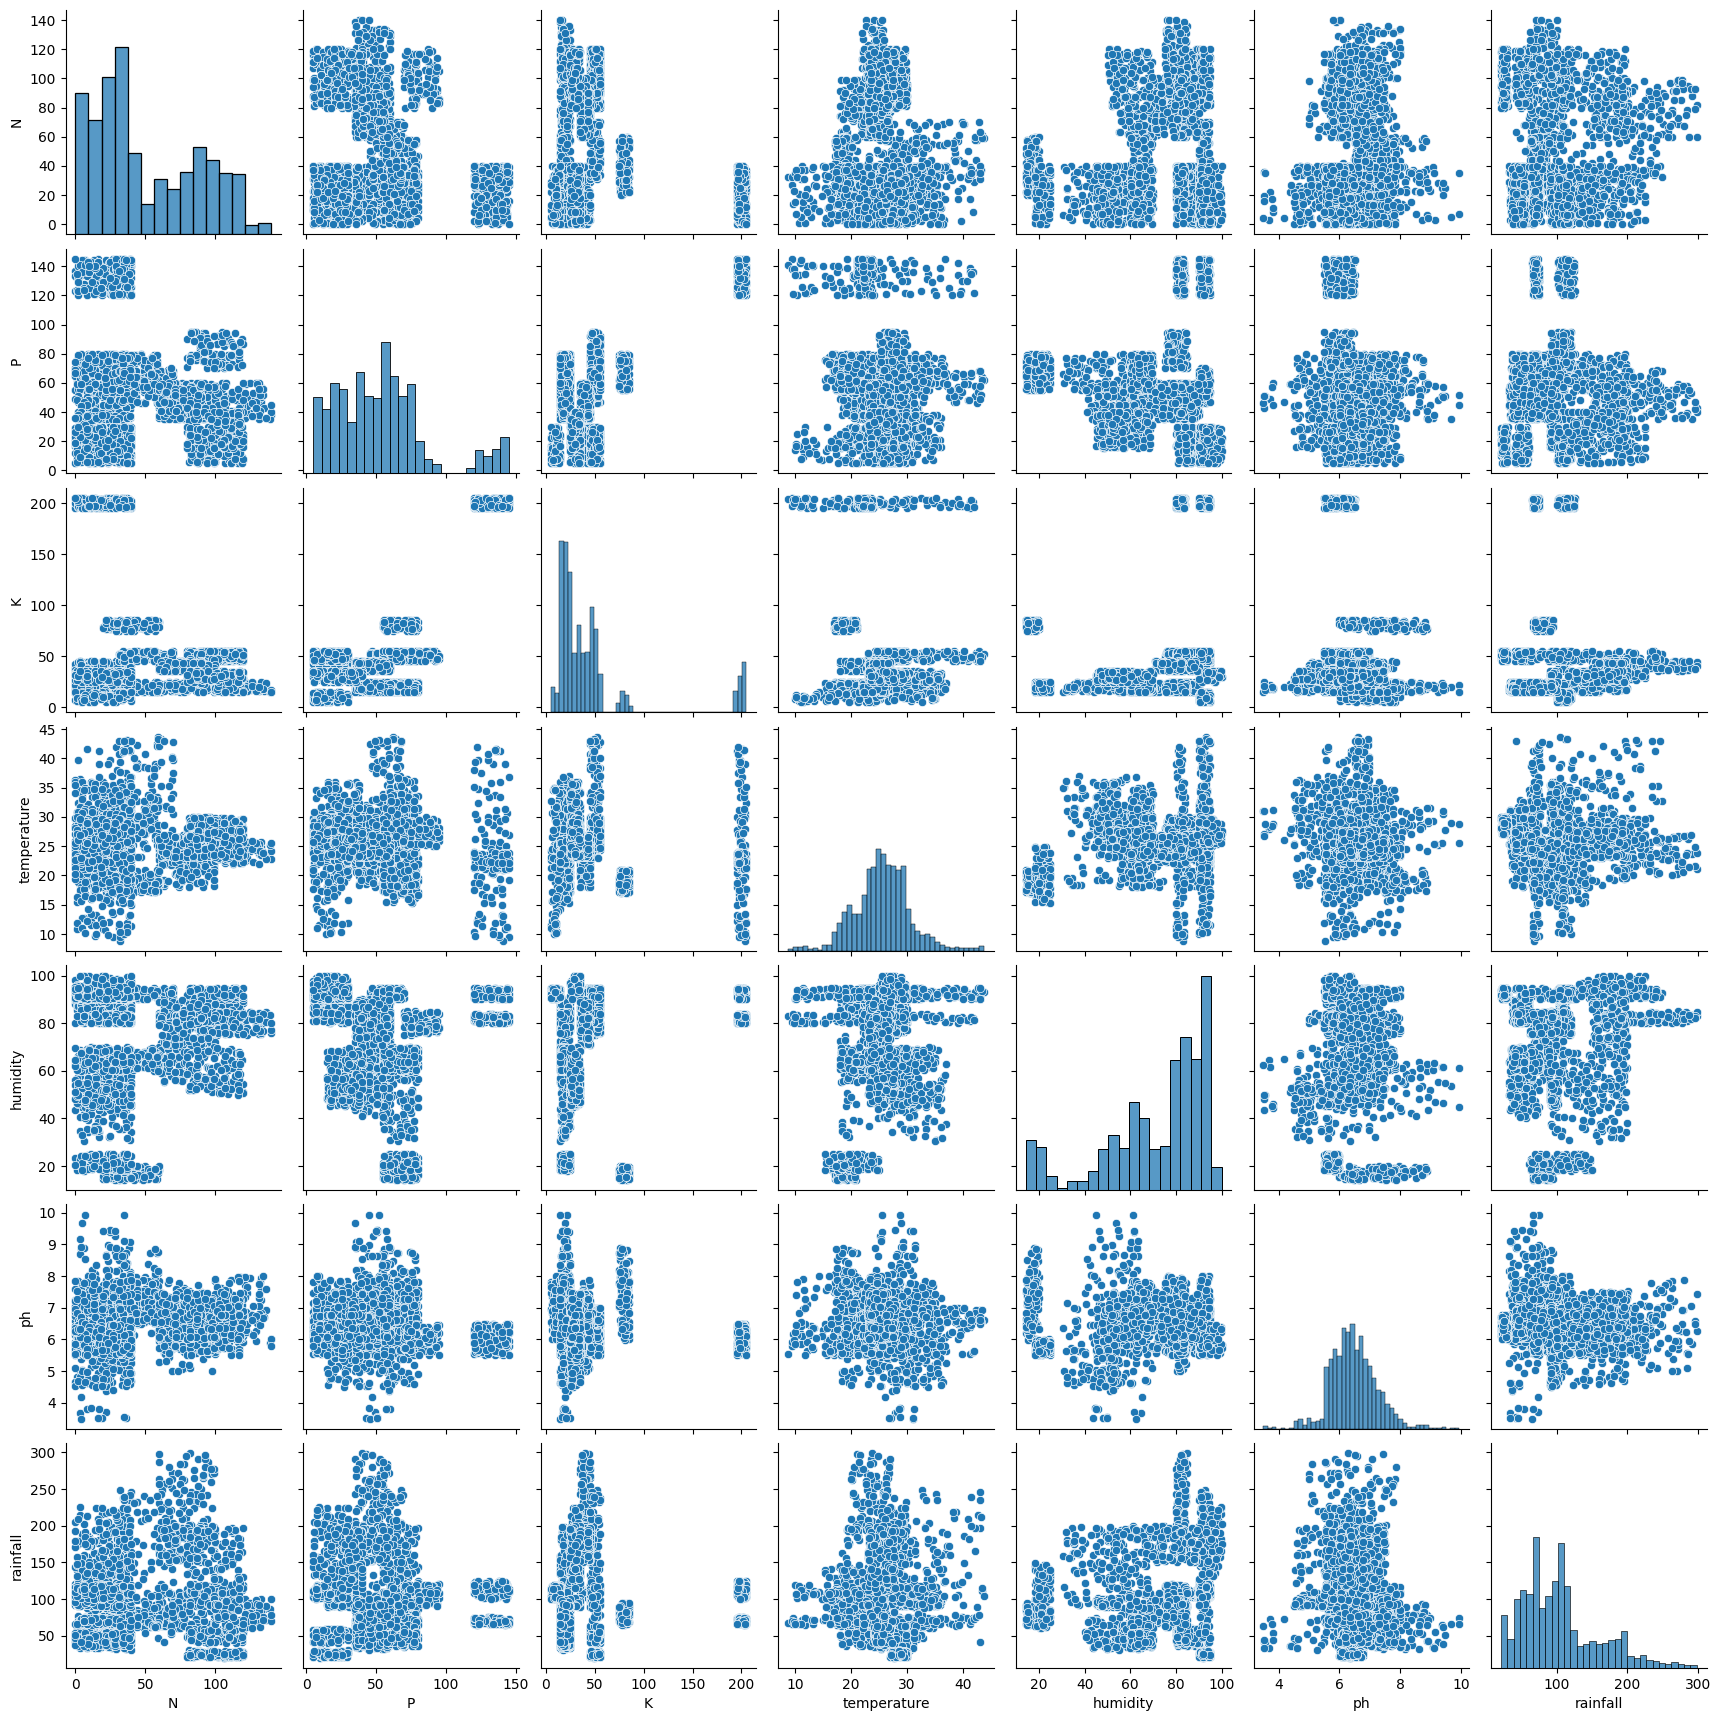

In [20]:
sns.pairplot(crop_df)

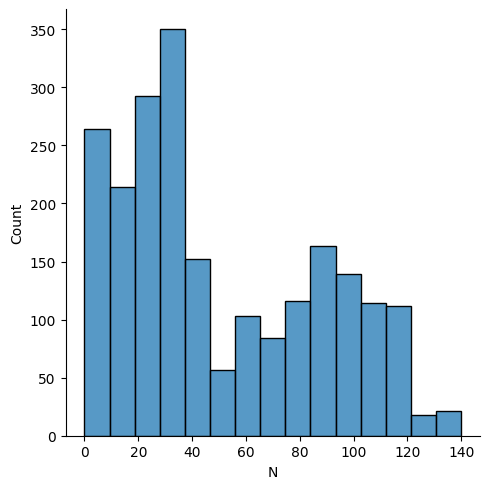

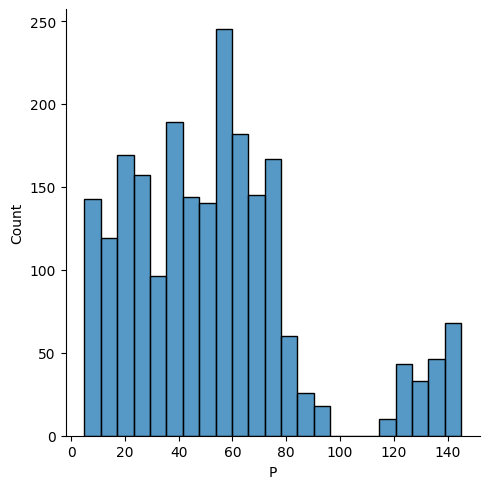

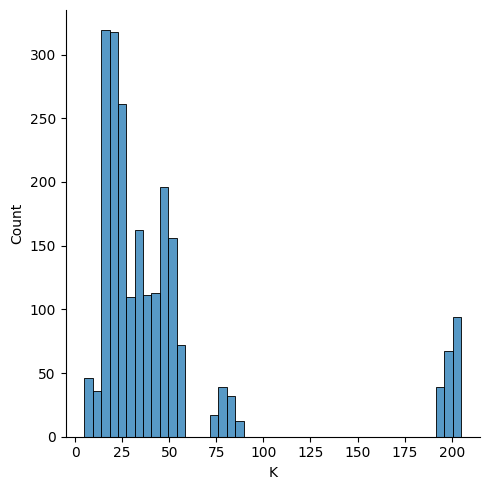

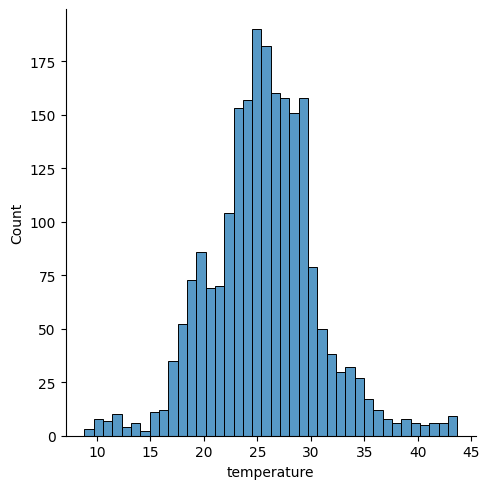

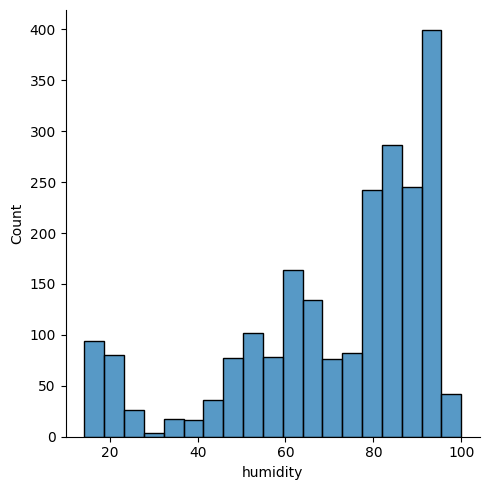

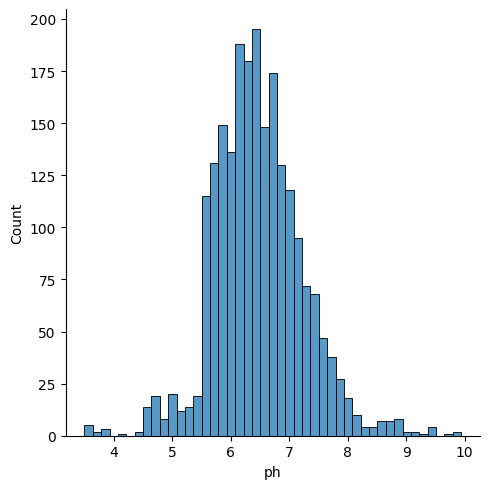

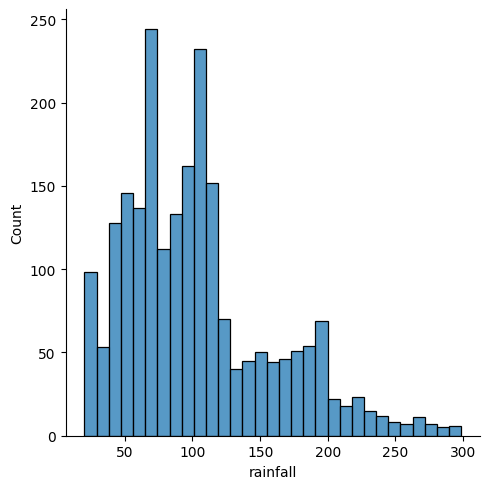

In [21]:
# To check distribution of values of each factor
cols =['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    sns.displot(crop_df[col])

<Axes: >

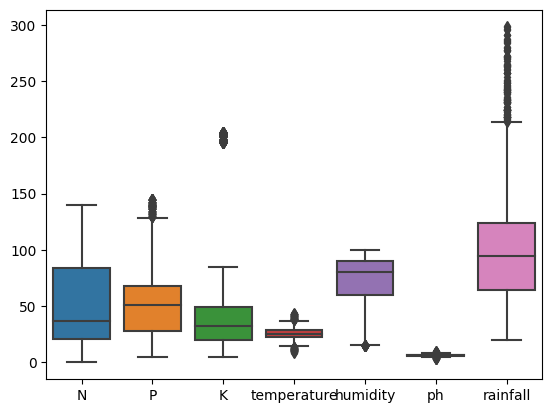

In [22]:
#To check outliers
sns.boxplot(crop_df)

In [23]:
cols =['N', 'P', 'K', 'humidity', 'rainfall']
crop_df1=crop_df.copy()

In [24]:
# Removing of outliers
cols =[ 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in cols:
    q1=crop_df1[col].quantile(0.25)
    q3=crop_df1[col].quantile(0.75)
    iqr=q3-q1
    uq =q3+iqr*(1.5)
    lq=q1-iqr*(1.5)
    crop_df1[col]=np.where(crop_df1[col]>uq, uq, np.where(crop_df1[col]<lq, lq,crop_df1[col]))

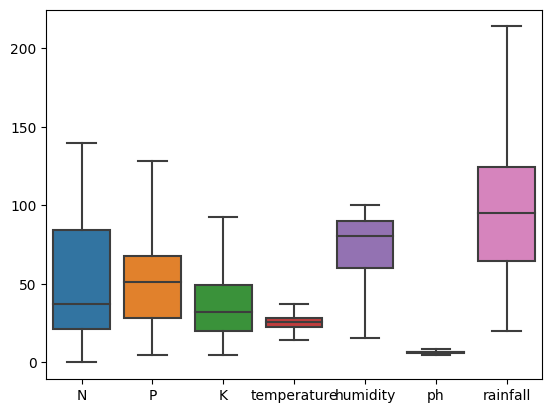

In [25]:
# Box plot after removing outliers
sns.boxplot(crop_df1)
plt.show()

In [26]:
crop_df1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.743182,38.376364,25.588591,71.493444,6.464070,101.986734
std,36.917334,31.427156,23.460322,4.738354,22.234536,0.729921,51.166180
min,0.000000,5.000000,5.000000,14.085000,15.731250,4.545000,20.210000
25%,21.000000,28.000000,20.000000,22.770000,60.262500,5.970000,64.552500
50%,37.000000,51.000000,32.000000,25.600000,80.470000,6.425000,94.865000
75%,84.250000,68.000000,49.000000,28.560000,89.950000,6.920000,124.270000
max,140.000000,128.000000,92.500000,37.245000,99.980000,8.345000,213.846250


In [27]:
crop_df1.head()
crop_df2=crop_df1.copy()
crop_df2 # Cleaned df for model development

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.88,82.00,6.50,202.94000,rice
1,85,58.0,41.0,21.77,80.32,7.04,213.84625,rice
2,60,55.0,44.0,23.00,82.32,7.84,213.84625,rice
3,74,35.0,40.0,26.49,80.16,6.98,213.84625,rice
4,78,42.0,42.0,20.13,81.60,7.63,213.84625,rice
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.77,66.41,6.78,177.77000,coffee
2196,99,15.0,27.0,27.42,56.64,6.09,127.92000,coffee
2197,118,33.0,30.0,24.13,67.23,6.36,173.32000,coffee
2198,117,32.0,34.0,26.27,52.13,6.76,127.18000,coffee


# Model development

In [28]:
# For numerical encoding and to scale data
from sklearn.preprocessing import StandardScaler, LabelEncoder 

# Splitting of data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# To test accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
#Numerical encoding of string values
le=LabelEncoder()
crop_df2['label_n']=le.fit_transform(crop_df2['label'])

In [30]:
crop_df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_n
0,90,42.0,43.0,20.88,82.00,6.50,202.94000,rice,20
1,85,58.0,41.0,21.77,80.32,7.04,213.84625,rice,20
2,60,55.0,44.0,23.00,82.32,7.84,213.84625,rice,20
3,74,35.0,40.0,26.49,80.16,6.98,213.84625,rice,20
4,78,42.0,42.0,20.13,81.60,7.63,213.84625,rice,20


In [31]:
#crop and their numerical_codes
label_df =crop_df2.loc[:, 'label':'label_n']
label_df.drop_duplicates(inplace=True)
label_df.sort_values('label_n', ascending =True)

,label,label_n
1500,apple,0
1000,banana,1
700,blackgram,2
200,chickpea,3
1800,coconut,4
2100,coffee,5
1900,cotton,6
1200,grapes,7
2000,jute,8
300,kidneybeans,9


In [32]:
crop_df3=crop_df2.drop('label', axis=1)
crop_df3

,N,P,K,temperature,humidity,ph,rainfall,label_n
0,90,42.0,43.0,20.88,82.00,6.50,202.94000,20
1,85,58.0,41.0,21.77,80.32,7.04,213.84625,20
2,60,55.0,44.0,23.00,82.32,7.84,213.84625,20
3,74,35.0,40.0,26.49,80.16,6.98,213.84625,20
4,78,42.0,42.0,20.13,81.60,7.63,213.84625,20
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.77,66.41,6.78,177.77000,5
2196,99,15.0,27.0,27.42,56.64,6.09,127.92000,5
2197,118,33.0,30.0,24.13,67.23,6.36,173.32000,5
2198,117,32.0,34.0,26.27,52.13,6.76,127.18000,5


<Axes: >

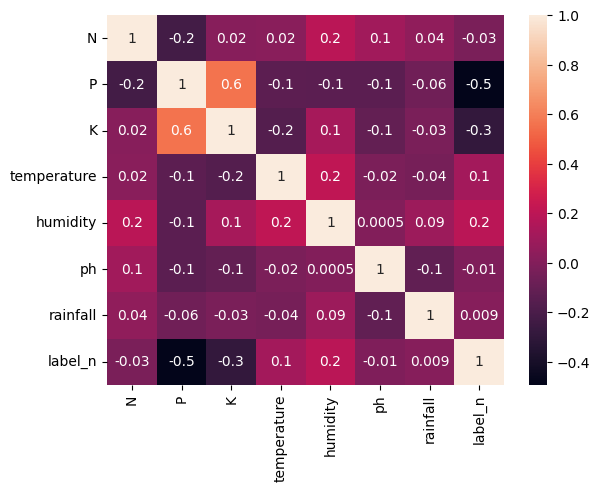

In [33]:
# Correlation among factors and crop
sns.heatmap(crop_df3.corr(), annot=True, fmt='0.1g')

In [34]:
x=crop_df3.drop('label_n', axis=1)
y=crop_df3['label_n']

In [35]:
print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [36]:
# Splitting of dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x, y, stratify= y, test_size=0.25, random_state= 1)

In [37]:
#Scaling of data for attaining narrow range among values of different columns
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train

array([[-0.87537216, -1.07882387, -0.39962859, ...,  0.94517963,
        -0.3658712 ,  1.19128597],
       [-1.01091175,  0.26143812, -0.61266399, ..., -0.08043018,
         1.57202082, -1.03218297],
       [-0.87537216, -1.04691287, -0.52744983, ..., -0.87662727,
        -1.41669998, -0.23667302],
       ...,
       [-0.79404841, -1.04691287, -0.31441443, ...,  1.27040589,
        -0.84352064,  1.24969001],
       [-1.20066717,  2.27183109,  2.30592099, ...,  1.00635635,
        -0.69340225,  0.14765687],
       [-1.03801967, -1.04691287, -1.2091631 , ...,  0.97306902,
         0.07083686,  0.14530503]])

# Supervised

In [38]:
# importing Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [39]:
#Comparing accuracy and selecting suitable model
models =[LogisticRegression(max_iter=10000), RandomForestClassifier(random_state=1), KNeighborsClassifier(), SVC(kernel='linear')]

for model in models:
    cv_score=cross_val_score(model, x_train, y_train, cv=5) # cv - splits data into 5 folds
    mean= (sum(cv_score)/len(cv_score)*100).round(2)
    
    print(model)
    print('cross validation accuracies', cv_score)
    print('accuracy score', mean)
    print('**************************************************************************************')

LogisticRegression(max_iter=10000)
cross validation accuracies [0.97575758 0.96363636 0.97575758 0.96060606 0.96666667]
accuracy score 96.85
**************************************************************************************
RandomForestClassifier(random_state=1)
cross validation accuracies [0.99090909 0.9969697  0.99393939 0.99393939 0.99393939]
accuracy score 99.39
**************************************************************************************
KNeighborsClassifier()
cross validation accuracies [0.97878788 0.97575758 0.97575758 0.96666667 0.98181818]
accuracy score 97.58
**************************************************************************************
SVC(kernel='linear')
cross validation accuracies [0.98181818 0.98787879 0.98181818 0.97878788 0.97878788]
accuracy score 98.18
**************************************************************************************


RandomForestClassifier has observed highest accuracy compare to other models

In [40]:
model =RandomForestClassifier(random_state=1)

In [41]:
#model development
model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [42]:
#Prediction of x_test values
pred=model.predict(x_test)

In [43]:
# To check accuracy at different stages of model development
cv_score=cross_val_score(model, x_train, y_train, cv=5)
print("Model_Accuracy")
print('Training_accuracy:',model.score(x_train, y_train))
print('cross_validation_accuracy:',cv_score.mean().round(2))
print('Testing_accuracy:', accuracy_score(y_test, pred).round(2))


Model_Accuracy
Training_accuracy: 1.0
cross_validation_accuracy: 0.99
Testing_accuracy: 1.0


In [44]:
print('RandomForestClassifier classification_report')
print('-------------------------------------')
print(classification_report(y_test, pred))

RandomForestClassifier classification_report
-------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        25
           8       1.00      0.96      0.98        25
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        25
          15       1.00      1.00      1.00        2

RandomForestClassifier confusion_matrix
-------------------------------------
[[25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

Text(50.722222222222214, 0.5, 'y_test')

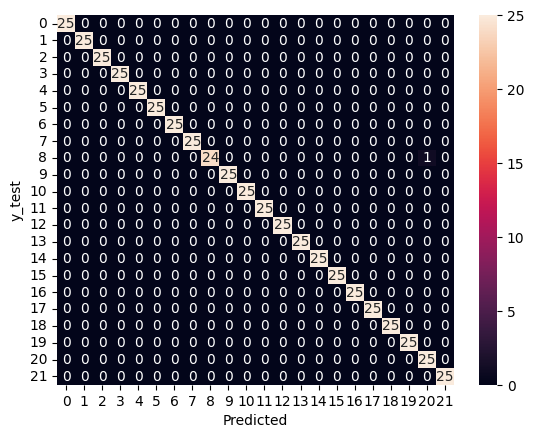

In [45]:
print('RandomForestClassifier confusion_matrix')
print('-------------------------------------')
cm= confusion_matrix(y_test, pred)
print(cm)


sns.heatmap(cm, annot=True, fmt='0.3g')
plt.xlabel('Predicted')
plt.ylabel('y_test')

In [46]:
# Manual Comparision 
result=model.predict(x_train)

y_t=np.array(y_train[0:10])

print('x_train',result[0:10])
print('y_train',y_t)


x_train [ 4 10 12 11  1 13 12  5  5 13]
y_train [ 4 10 12 11  1 13 12  5  5 13]


# User interface

In [47]:
factors=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
inputs ={}
print("Enter the soil and climatic factors value ")
for f in factors:
    fa=input(f'enter {f} :')
    inputs[f]=fa


Enter the soil and climatic factors value 
enter N :150
enter P :40
enter K :70
enter temperature :26
enter humidity :90
enter ph :6.5
enter rainfall :150


In [48]:
in_df=pd.DataFrame([inputs])
in_df

,N,P,K,temperature,humidity,ph,rainfall
0,150,40,70,26,90,6.5,150


In [49]:
re_df=crop_df3[0:2].drop('label_n', axis=1)
re_df=pd.concat([in_df, re_df], axis=0, ignore_index=True)
sc_inputs=sc.fit_transform(re_df)
result=model.predict(sc_inputs)
cr=result[0]
print(cr)

15


In [50]:
crop= label_df[label_df['label_n']==cr]['label'].values
print('Suitable crop for above conditions is: ', crop)


Suitable crop for above conditions is:  ['muskmelon']


# Unsupervised

In [51]:
from sklearn.cluster import KMeans

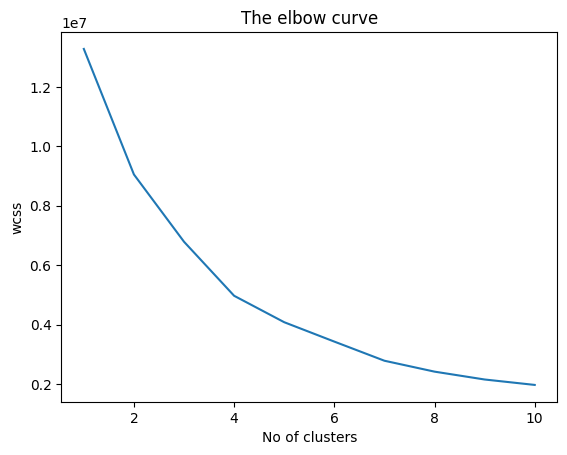

In [52]:
wcss = []
for i in range(1, 11):
    km =KMeans(n_clusters = i,init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(x)
    wcss.append(km.inertia_)

sns.lineplot(x=range(1,11), y=wcss)
plt.title("The elbow curve")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [53]:
model2 =KMeans(n_clusters = 5, init='k-means++', max_iter=300, n_init=10, random_state=1)
model2.fit(x, y)

KMeans(n_clusters=5, n_init=10, random_state=1)

In [54]:
predictions = model2.predict(x)
predictions=pd.DataFrame(predictions)

In [55]:
prd_df=pd.concat([predictions, crop_df2['label']], axis=1)

In [56]:
prd_df.rename(columns={0:'Clusters'}, inplace=True)

In [61]:
for i in range(5):
    print("Cluster", i+1, '=',prd_df[prd_df['Clusters']==i]['label'].unique())


Cluster 1 = ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
Cluster 2 = ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'mango' 'papaya']
Cluster 3 = ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 4 = ['maize' 'kidneybeans' 'pigeonpeas' 'pomegranate' 'mango' 'orange'
 'papaya' 'coconut']
Cluster 5 = ['grapes' 'apple']


In [62]:
result2=model2.predict(sc_inputs)
cr2=result2[0]
print(cr2)

1


C:\Users\PATIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [63]:
crop2= label_df[label_df['label_n']==cr2]['label'].values
print('Suitable crop for above conditions is: ', crop2)


Suitable crop for above conditions is:  ['banana']
